In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [33]:
image = cv2.imread('/content/img.jpg')

# Changing the channel. from BGR to RGB. (As OpenCV takes image as BGR by default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Check the image shape
print("before resizing",image.shape)

# Let's Resize it.
down_width = 500
down_height = 500
down_points = (down_width, down_height)
image = cv2.resize(image, down_points)

# Again check the size of the image.
print("after resizing",image.shape)

before resizing (900, 720, 3)
after resizing (500, 500, 3)


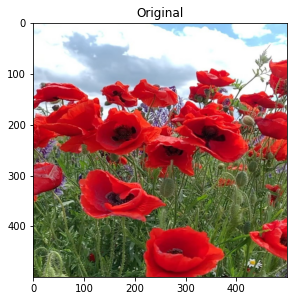

In [37]:
# Plot the image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# 1. Sharpening

In [38]:
from google.colab.patches import cv2_imshow

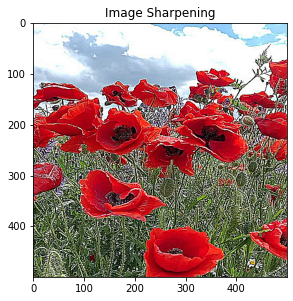

In [40]:
# Create our shapening kernel, we don't normalize since the values in the matrix sum to 1.
kernel_1 = np.array([[-1,-1,-1], 
                    [-1,9,-1], 
                    [-1,-1,-1]])

# Applying kernel to the input image
sharpened = cv2.filter2D(image, -1, kernel_1)

# Plot the image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)

# 2. Blurring

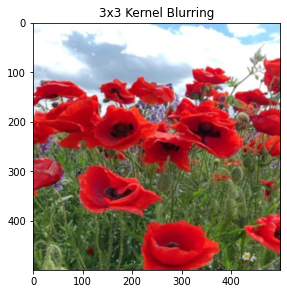

In [41]:
# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)

# Plot the image.
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
plt.title("3x3 Kernel Blurring")
plt.imshow(blurred)

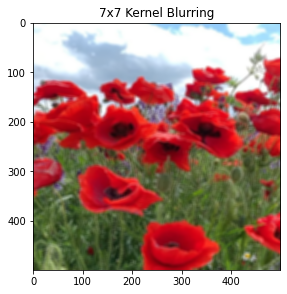

In [42]:
# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 3)
plt.title("7x7 Kernel Blurring")
plt.imshow(blurred2)

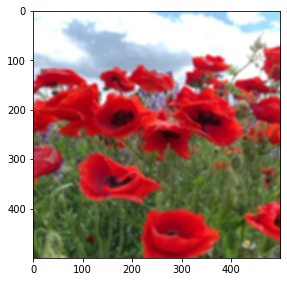

In [52]:
# Easy way
blurred3 = cv2.blur(image, (15,15)) # k = (15,15) size.

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 3)

plt.imshow(blurred2)

# 3. Emboss

When an emboss filter is applied to a picture, the resulting image resembles an emboss – a paper or metal emboss of the original image in which the features stand out in high relief (more prominently) or low relief (less prominently) (less prominently). 

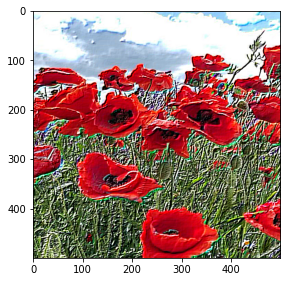

In [54]:
# Kernel
kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])

# Applying to the image
img = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 3)

plt.imshow(img)

# Asymmetric kernels

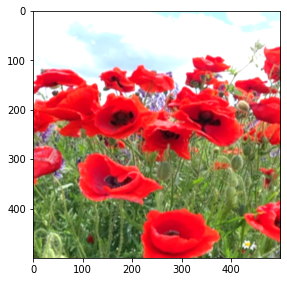

In [57]:
# Kernels
k1 = np.ones((4, 3), np.float32) / 9

img = cv2.filter2D(image, -1, k1)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 3)

plt.imshow(img)

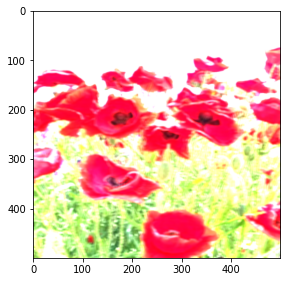

In [58]:
k1 = np.ones((4, 7), np.float32) / 9

img = cv2.filter2D(image, -1, k1)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 3)

plt.imshow(img)

# Edge detect

In [59]:
sobel_x = np.array([[ -1, 0, 1],
                    [ -2, 0, 2],
                    [ -1, 2, 1]])

sobel_y = np.array([[ -1, -2, -1],
                    [ 0, 0, 0],
                    [ 1, 2, 1]])


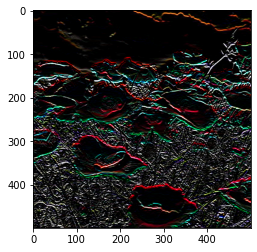

In [66]:
filtered_image = cv2.filter2D(image, -1, sobel_y)
plt.imshow(filtered_image)


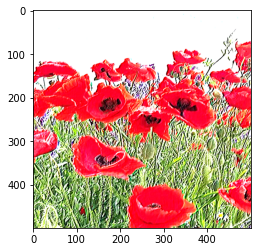

In [69]:
filtered_image1 = cv2.filter2D(image, -1, sobel_x)
plt.imshow(filtered_image1)

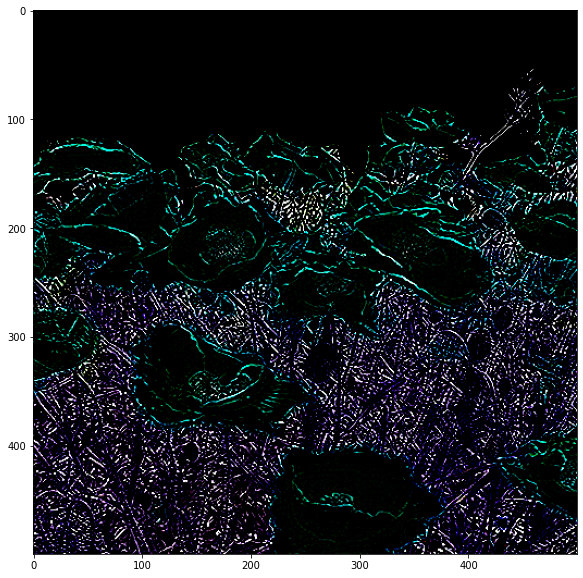

In [71]:
edge_detection = [[0,0,-2.5,0,0],
                    [0,0,-1,0,0],
                    [-2.5,-1,12,-1,-2.5],
                    [0,0,-1,0,0],
                    [0,0,-2.5,0,0]]
edge_detection = np.array(edge_detection)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image2 = cv2.filter2D(image, -1, edge_detection)

plt.figure(figsize = (10,10))
plt.imshow(filtered_image2, cmap='gray')
plt.show()